In [74]:
!pip install plotly

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('../DataOut.csv')

In [77]:
df.head()

,Unnamed: 0,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,67
1,1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,70
2,2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,59
3,3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,40
4,4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,43


In [86]:
import pandas as pd
import plotly.express as px


# Calculer l'âge des clients
#df['Age'] = 2024 - df['Year_Birth']

# Créer un histogramme interactif avec Plotly
fig = px.histogram(df, x='Age', nbins=20, title='Distribution des âges des clients',
                   labels={'Age': 'Âge'}, 
                   color_discrete_sequence=['skyblue'])

# Afficher le graphique
fig.show()


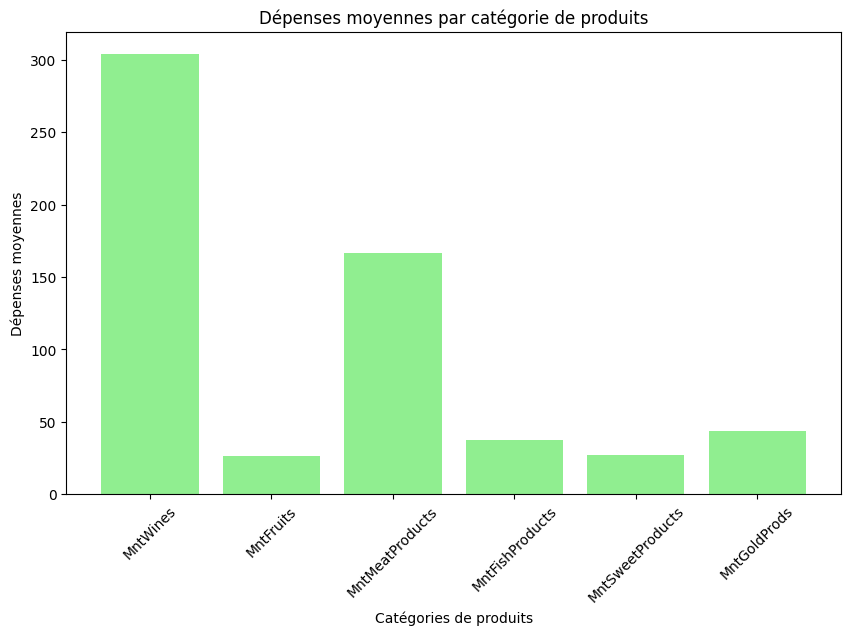

In [79]:
# Dépenses moyennes dans chaque catégorie de produits
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
moyennes = df[categories].mean()

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, moyennes, color='lightgreen')
plt.title('Dépenses moyennes par catégorie de produits')
plt.xlabel('Catégories de produits')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.show()

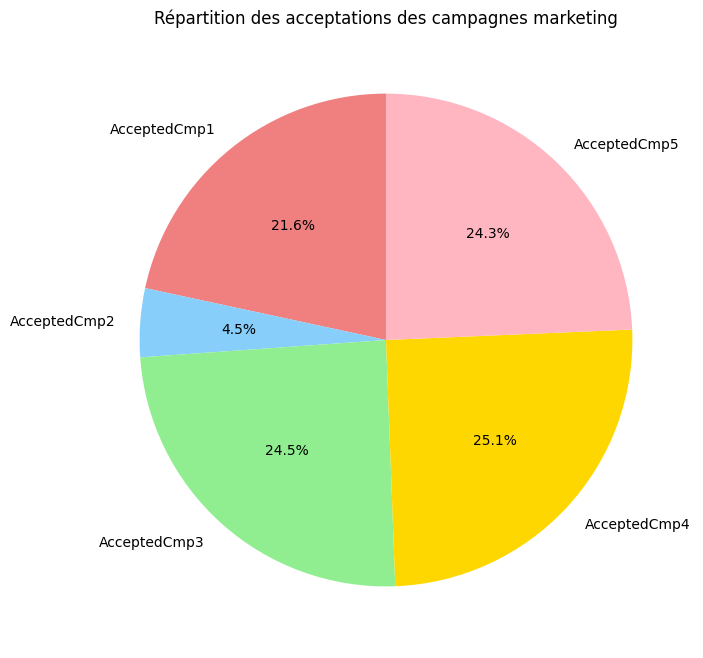

In [80]:
# Somme des clients ayant accepté chaque campagne
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptations = df[campagnes].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(acceptations, labels=campagnes, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Répartition des acceptations des campagnes marketing')
plt.show()

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Has_Children                                                          
Avec enfants  231.1825  15.941875        85.143750        22.003750   
Sans enfants  486.8854  52.213501       372.312402        76.503925   

              MntSweetProducts  MntGoldProds  
Has_Children                                  
Avec enfants         16.727500     36.034375  
Sans enfants         53.043956     63.897959  


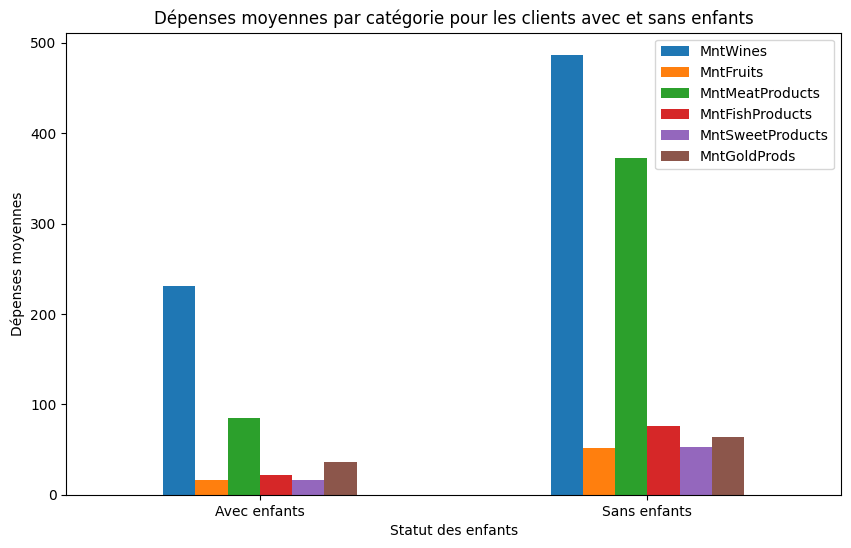

In [81]:
# Créer une nouvelle colonne pour indiquer si le client a des enfants
df['Has_Children'] = df['Kidhome'] + df['Teenhome']
df['Has_Children'] = df['Has_Children'].apply(lambda x: 'Avec enfants' if x > 0 else 'Sans enfants')

# Comparer les dépenses moyennes pour ceux avec et sans enfants
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

depenses_moyennes = df.groupby('Has_Children')[categories].mean()

# Afficher les résultats
print(depenses_moyennes)

# Visualiser les résultats avec un diagramme en barres
depenses_moyennes.plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses moyennes par catégorie pour les clients avec et sans enfants')
plt.xlabel('Statut des enfants')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

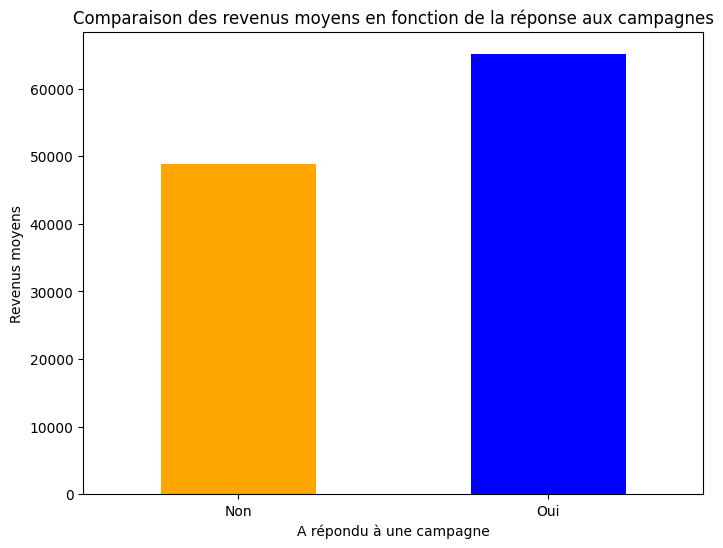

In [82]:
# Créer une colonne binaire indiquant si le client a répondu à une campagne (au moins une acceptée)
df['Has_Responded'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Comparer les revenus moyens entre ceux qui ont répondu et ceux qui n'ont pas répondu
revenus_moyens = df.groupby('Has_Responded')['Income'].mean()

# Visualiser avec un diagramme en barres
plt.figure(figsize=(8, 6))
revenus_moyens.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparaison des revenus moyens en fonction de la réponse aux campagnes')
plt.xlabel('A répondu à une campagne')
plt.ylabel('Revenus moyens')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()


In [83]:
# Calculer les dépenses totales pour chaque client
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


Il est important d'attendre d'avoir des cluster ici et de supp les donéee abérante pour un better scatter plot

In [84]:
import plotly.express as px

# Créer un scatter plot interactif avec Plotly
fig = px.scatter(df, x='Income', y='Total_Expenses', title='Relation entre les revenus et les dépenses totales des clients',
                 labels={'Income': 'Revenus', 'Total_Expenses': 'Dépenses totales'},
                 hover_data=['Education', 'Marital_Status'])

# Afficher le graphique
fig.show()
